In [1]:
import pandas as pd 
import io
import numpy as np 
from sklearn.svm import SVR,SVC
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
lb=LabelEncoder()
sc=StandardScaler()
mm=MinMaxScaler()
from sklearn.model_selection import train_test_split , GridSearchCV





In [2]:
my_df=pd.read_csv('weather.csv')

X=my_df.iloc[:,2:24].values

X 

Y=my_df.iloc[:,-1].values

Y 

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [3]:
# missing data 
imp=SimpleImputer(missing_values=np.nan,strategy="mean")
X[:,[1,2,3,4,5,7,10,11,12,13,14,15,16,17,18,19,21]]=imp.fit_transform(X[:,[1,2,3,4,5,7,10,11,12,13,14,15,16,17,18,19,21]])

In [4]:
# labelencoding 

X[:,20]=lb.fit_transform(X[:,20])
Y=lb.fit_transform(Y)


In [5]:
# Normaliztion 

X[:,[1,2,3,4,5,7,10,11,12,13,14,15,16,17,18,19,21]]=mm.fit_transform(X[:,[1,2,3,4,5,7,10,11,12,13,14,15,16,17,18,19,21]])

In [6]:
# onehotencoding
onehotencoder=ColumnTransformer([("encoder",OneHotEncoder(),[0])],remainder="passthrough")


X=np.array(onehotencoder.fit_transform(X))
X

onehotencoder=ColumnTransformer([("encoder",OneHotEncoder(),[14])],remainder="passthrough")
X=np.array(onehotencoder.fit_transform(X))
X

onehotencoder=ColumnTransformer([("encoder",OneHotEncoder(),[32])],remainder="passthrough")
X=np.array(onehotencoder.fit_transform(X))
X

onehotencoder=ColumnTransformer([("encoder",OneHotEncoder(),[49])],remainder="passthrough")
X=np.array(onehotencoder.fit_transform(X))
X


array([[0.0, 0.0, 0.0, ..., 0.38213399503722084, 0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.44416873449131516, 0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.41687344913151364, 0, 0.0],
       ...,
       [0.0, 0.0, 1.0, ..., 0.5409429280397022, 0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.5062034739454093, 0, 0.0],
       [0.0, 0.0, 0.0, ..., 0.5930521091811414, 0, 0.0]], dtype=object)

In [7]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,train_size=0.80 , random_state=42)
y_train
y_test

array([0, 0, 1, ..., 0, 1, 0])

In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20000, 78)
(20000,)
(5000, 78)
(5000,)


In [9]:
svcmodel=SVC(kernel='linear', C=10, random_state=7000)

In [10]:
svcmodel=svcmodel.fit(x_train,y_train)

In [11]:
print('SVRModel Train Score is : ' , svcmodel.score(x_train, y_train))
print('SVRModel Test Score is : ' , svcmodel.score(x_test, y_test))

SVRModel Train Score is :  0.93855
SVRModel Test Score is :  0.9398


In [12]:
y_predict=svcmodel.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

Confusion Matrix is : 
 [[3889    0]
 [ 301  810]]


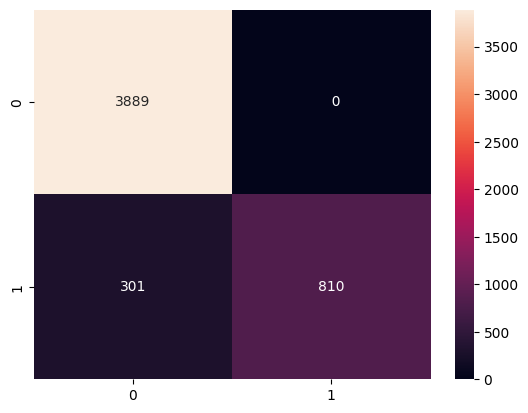

In [13]:
#Calculating Confusion Matrix
CM = confusion_matrix(y_test, y_predict)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, annot=True,fmt='3g')
# sns.heatmap(CM, center = True)
plt.show()


In [14]:
# generate some random data
# X, y = make_classification(n_samples=1000, n_features=10, random_state=5000)

# create random forest classifier
rfc = RandomForestClassifier(max_depth=5,n_estimators=10,max_features=10, random_state=5000)

# fit model to training data
rfc.fit(x_train, y_train)
score = rfc.score(x_test, y_test)
print("Accuracy:", score)
y_pred=rfc.predict(x_test)
# evaluate model performance on testing data



Accuracy: 0.963


Confusion Matrix is : 
 [[3885    4]
 [ 181  930]]


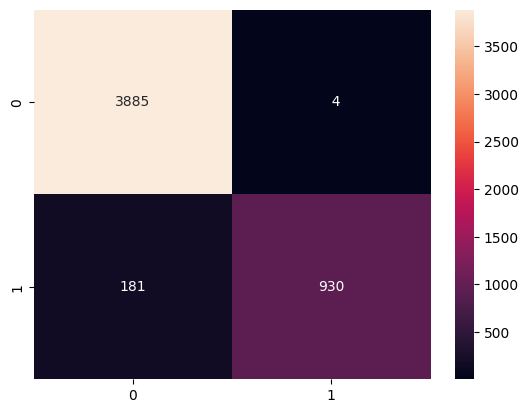

In [15]:
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, annot=True,fmt='3g')
# sns.heatmap(CM, center = True)
plt.show()

In [16]:
DTC = DecisionTreeClassifier(max_depth = 3, random_state = 93)
# DTC = DecisionTreeClassifier(max_leaf_nodes = 10, random_state = 0)
DTC.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=93)

In [17]:
predictions = DTC.predict(x_test)
# type(predictions)

In [18]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred = predictions)

1.0

In [19]:
mean_squared_error(y_test, y_pred = predictions)

0.0

In [20]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

Confusion Matrix is : 
 [[3889    0]
 [   0 1111]]


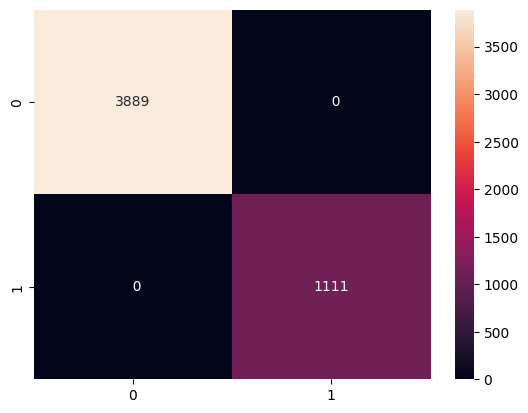

In [22]:
CM = confusion_matrix(y_test, predictions)
print('Confusion Matrix is : \n', CM)

# drawing confusion matrix
sns.heatmap(CM, annot=True,fmt='3g')
# sns.heatmap(CM, center = True)
plt.show()

In [ ]:
#from sklearn.tree import export_graphviz
# from io import StringIO  
# from IPython.display import Image  
# import pydotplus

# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True,feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('weather.png')
# Image(graph.create_png())